In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import datetime
path=os.getcwd()
DataFolder="20191009_raw_data"
productionData="field_production_monthly.csv"
wellData="wellbore_development_all.csv"
field='ORMEN LANGE'
fluid='gas'

In [10]:
#READING AND PROCESSING PRODUCTION DATA
#Importing all NCS production data
ProdFile=os.path.join(path, DataFolder,productionData)
dfProd=pd.read_csv(ProdFile,encoding="utf-8-sig")
#creating a date tag
dfProd['Date']=pd.to_datetime(dfProd[['year', 'month']].assign(day=28))
#removing production data with the name by field
#dfFieldProd=df_MonthlyProd[dfProd['field']==field] gives error with "settingwithcopywarning": https://www.dataquest.io/blog/settingwithcopywarning/
dfFieldProd=dfProd.drop(dfProd[dfProd['field']!=field].index)
#calculate cumulative production
dfFieldProd['Qp']=dfFieldProd[fluid].cumsum()

In [11]:
#importing all NCS wellbore data
WellData=os.path.join(path, DataFolder,wellData)
dfWell=pd.read_csv(WellData,encoding="utf-8-sig")
#filtering by production wells only
dfWell=dfWell.drop(dfWell[dfWell['wlbPurpose']!="PRODUCTION"].index)
#filtering by field
dfWell=dfWell.drop(dfWell[dfWell['wlbField']!=field].index)

In [12]:
#determining total wells completed in time
#removing wells that don't have acompletion date
dfWell=dfWell.dropna(subset=['wlbCompletionDate'])
#converting the time tag into a pandas date
dfWell['wlbCompletionDate']=pd.to_datetime(dfWell['wlbCompletionDate'],dayfirst=True)
#sorting by date
dfWell=dfWell.sort_values(by='wlbCompletionDate')
#Creating a well counter to compute total number of wells in the field with time
dfWell['Nw']=1
#calculating total number of wells in the field
dfWell['Nw_tot']=dfWell['Nw'].cumsum()

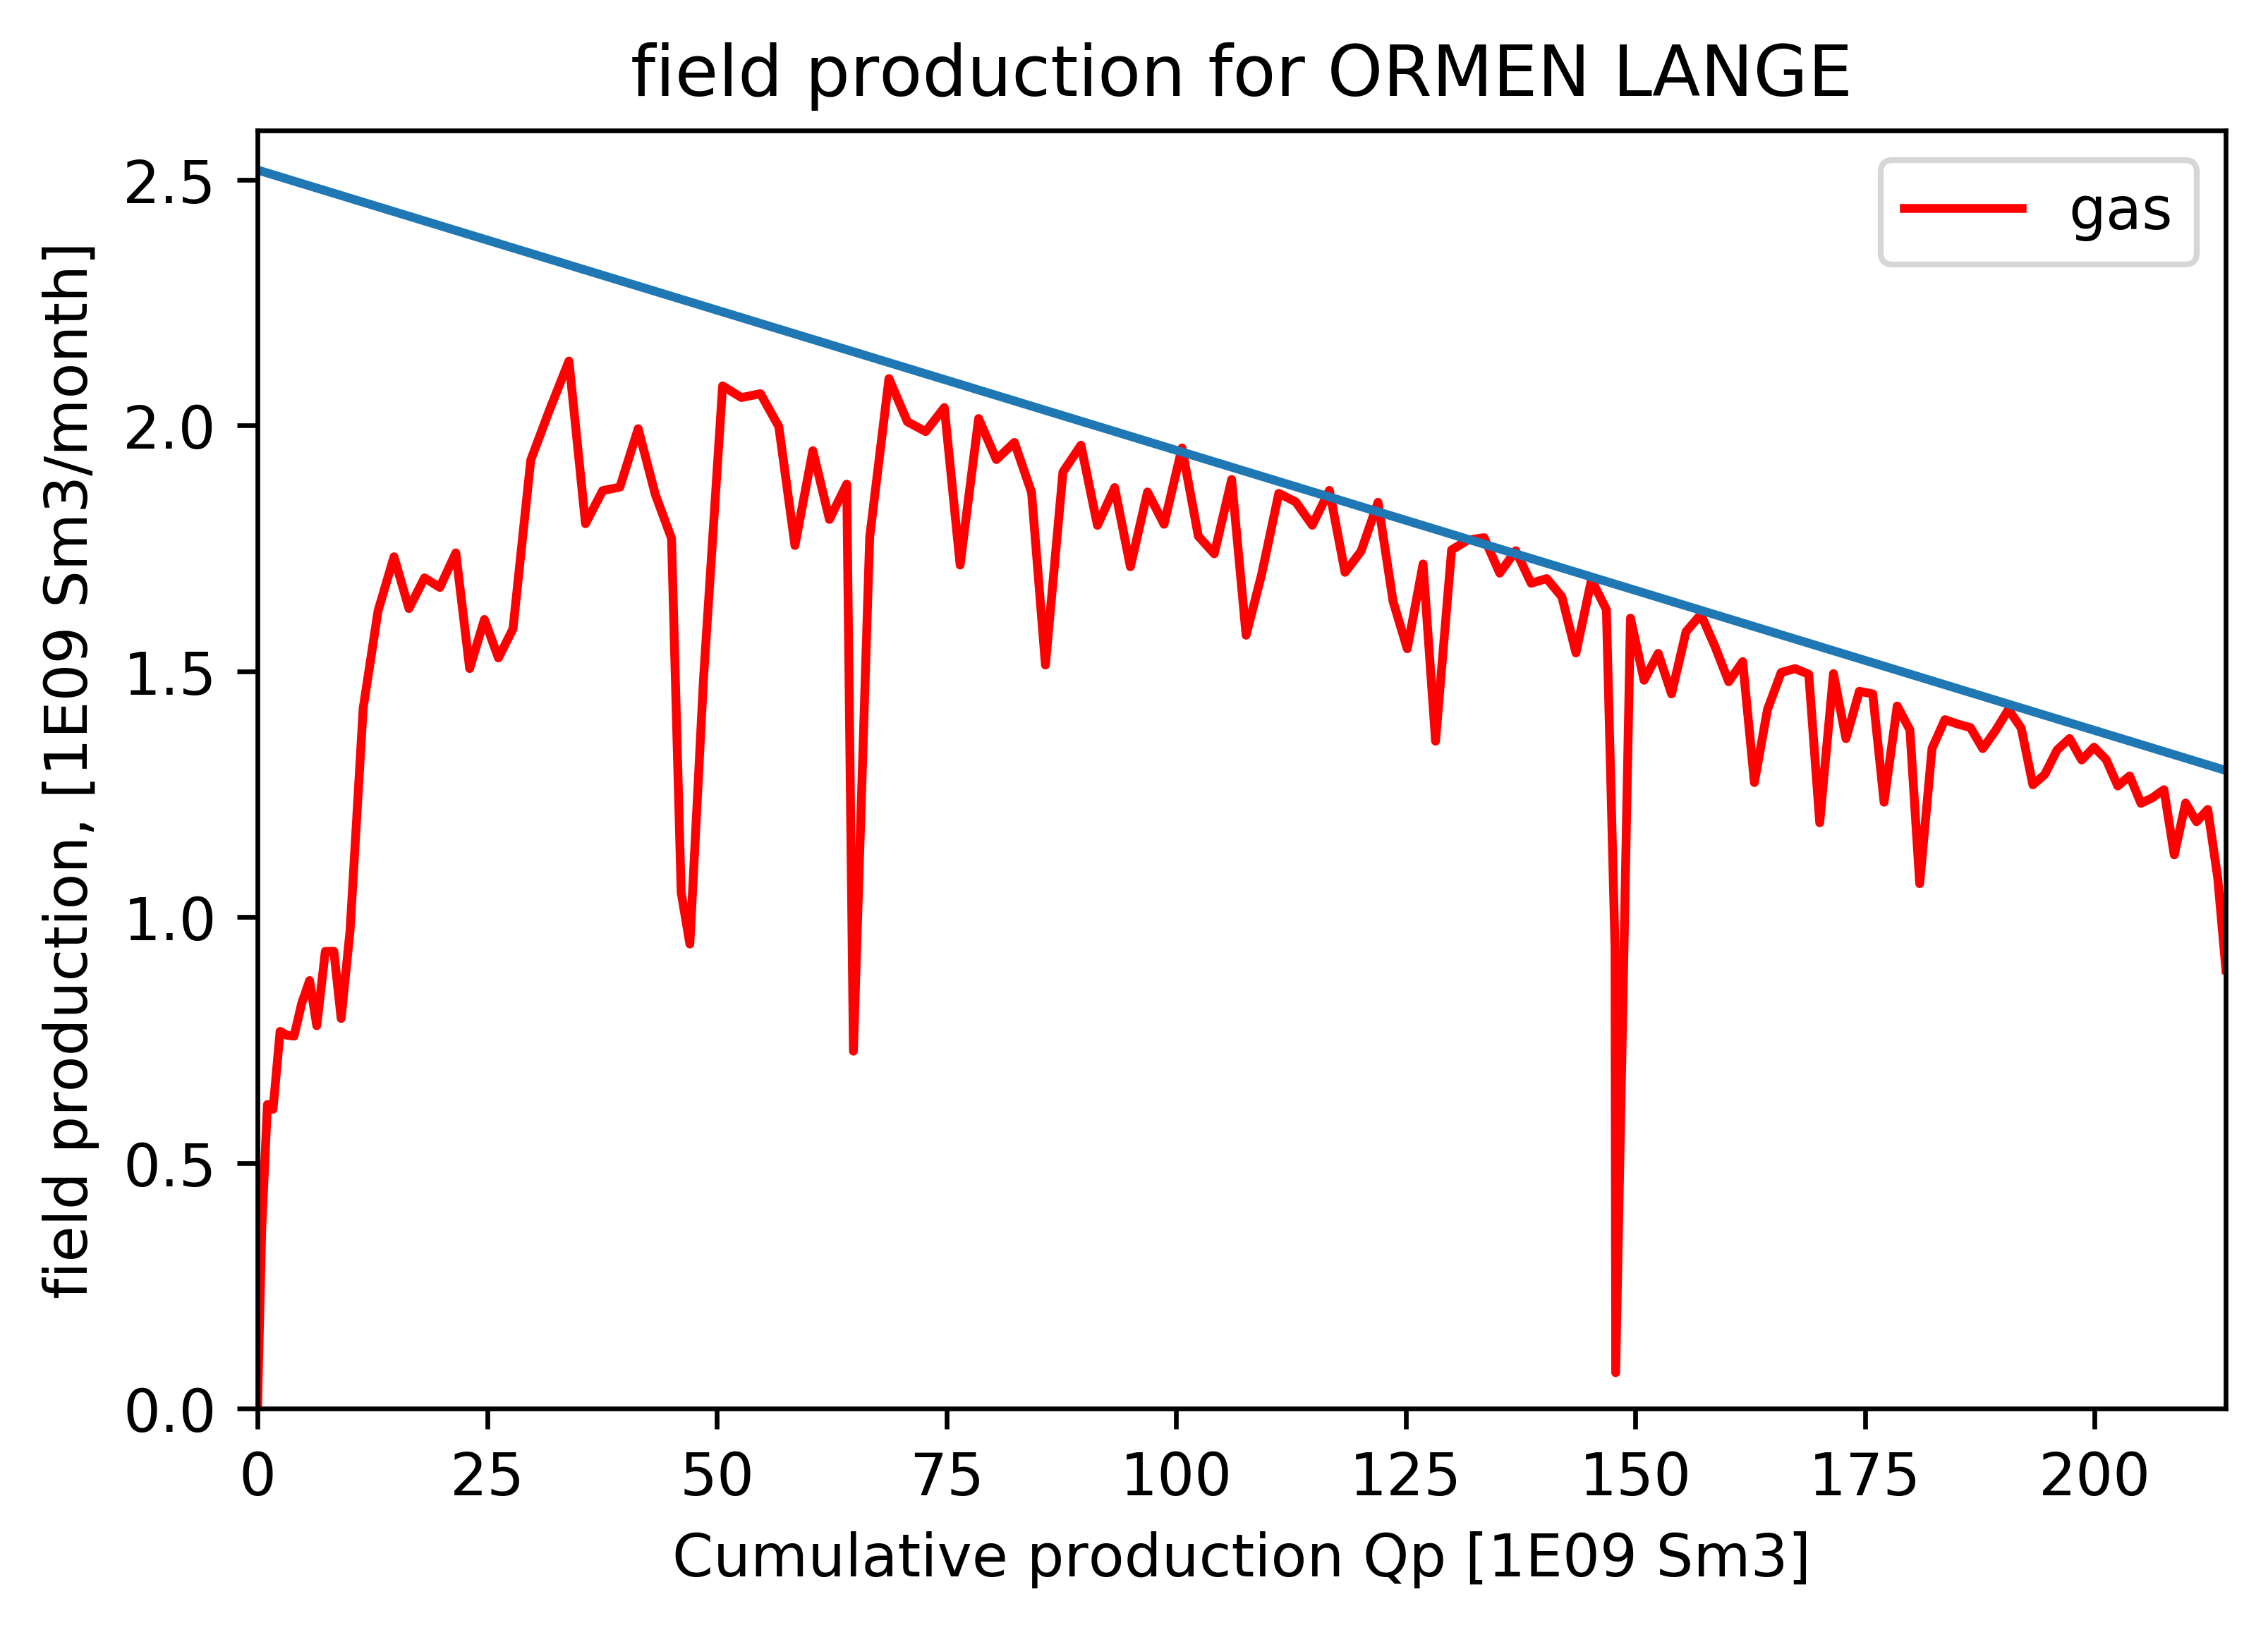

In [13]:
#Field rate vs Qp
dfFieldProd.plot('Qp',fluid,color='red',ylim=(0),xlim=(0))
plt.title('field production for '+ field )
plt.xlabel('Cumulative production Qp [1E09 Sm3]')
plt.ylabel('field production, [1E09 Sm3/month]')
#dfregression=dfFieldProd[dfFieldProd['Qp'] > 75]
#regres = np.polyfit(dfregression['Qp'], dfregression[fluid], 1)
#print(regres)
x1=np.linspace(0,250,10)
y1=-0.0057*x1+  2.52
plt.plot(x1,y1)
plt.ylim([0,2.6])
plt.show()

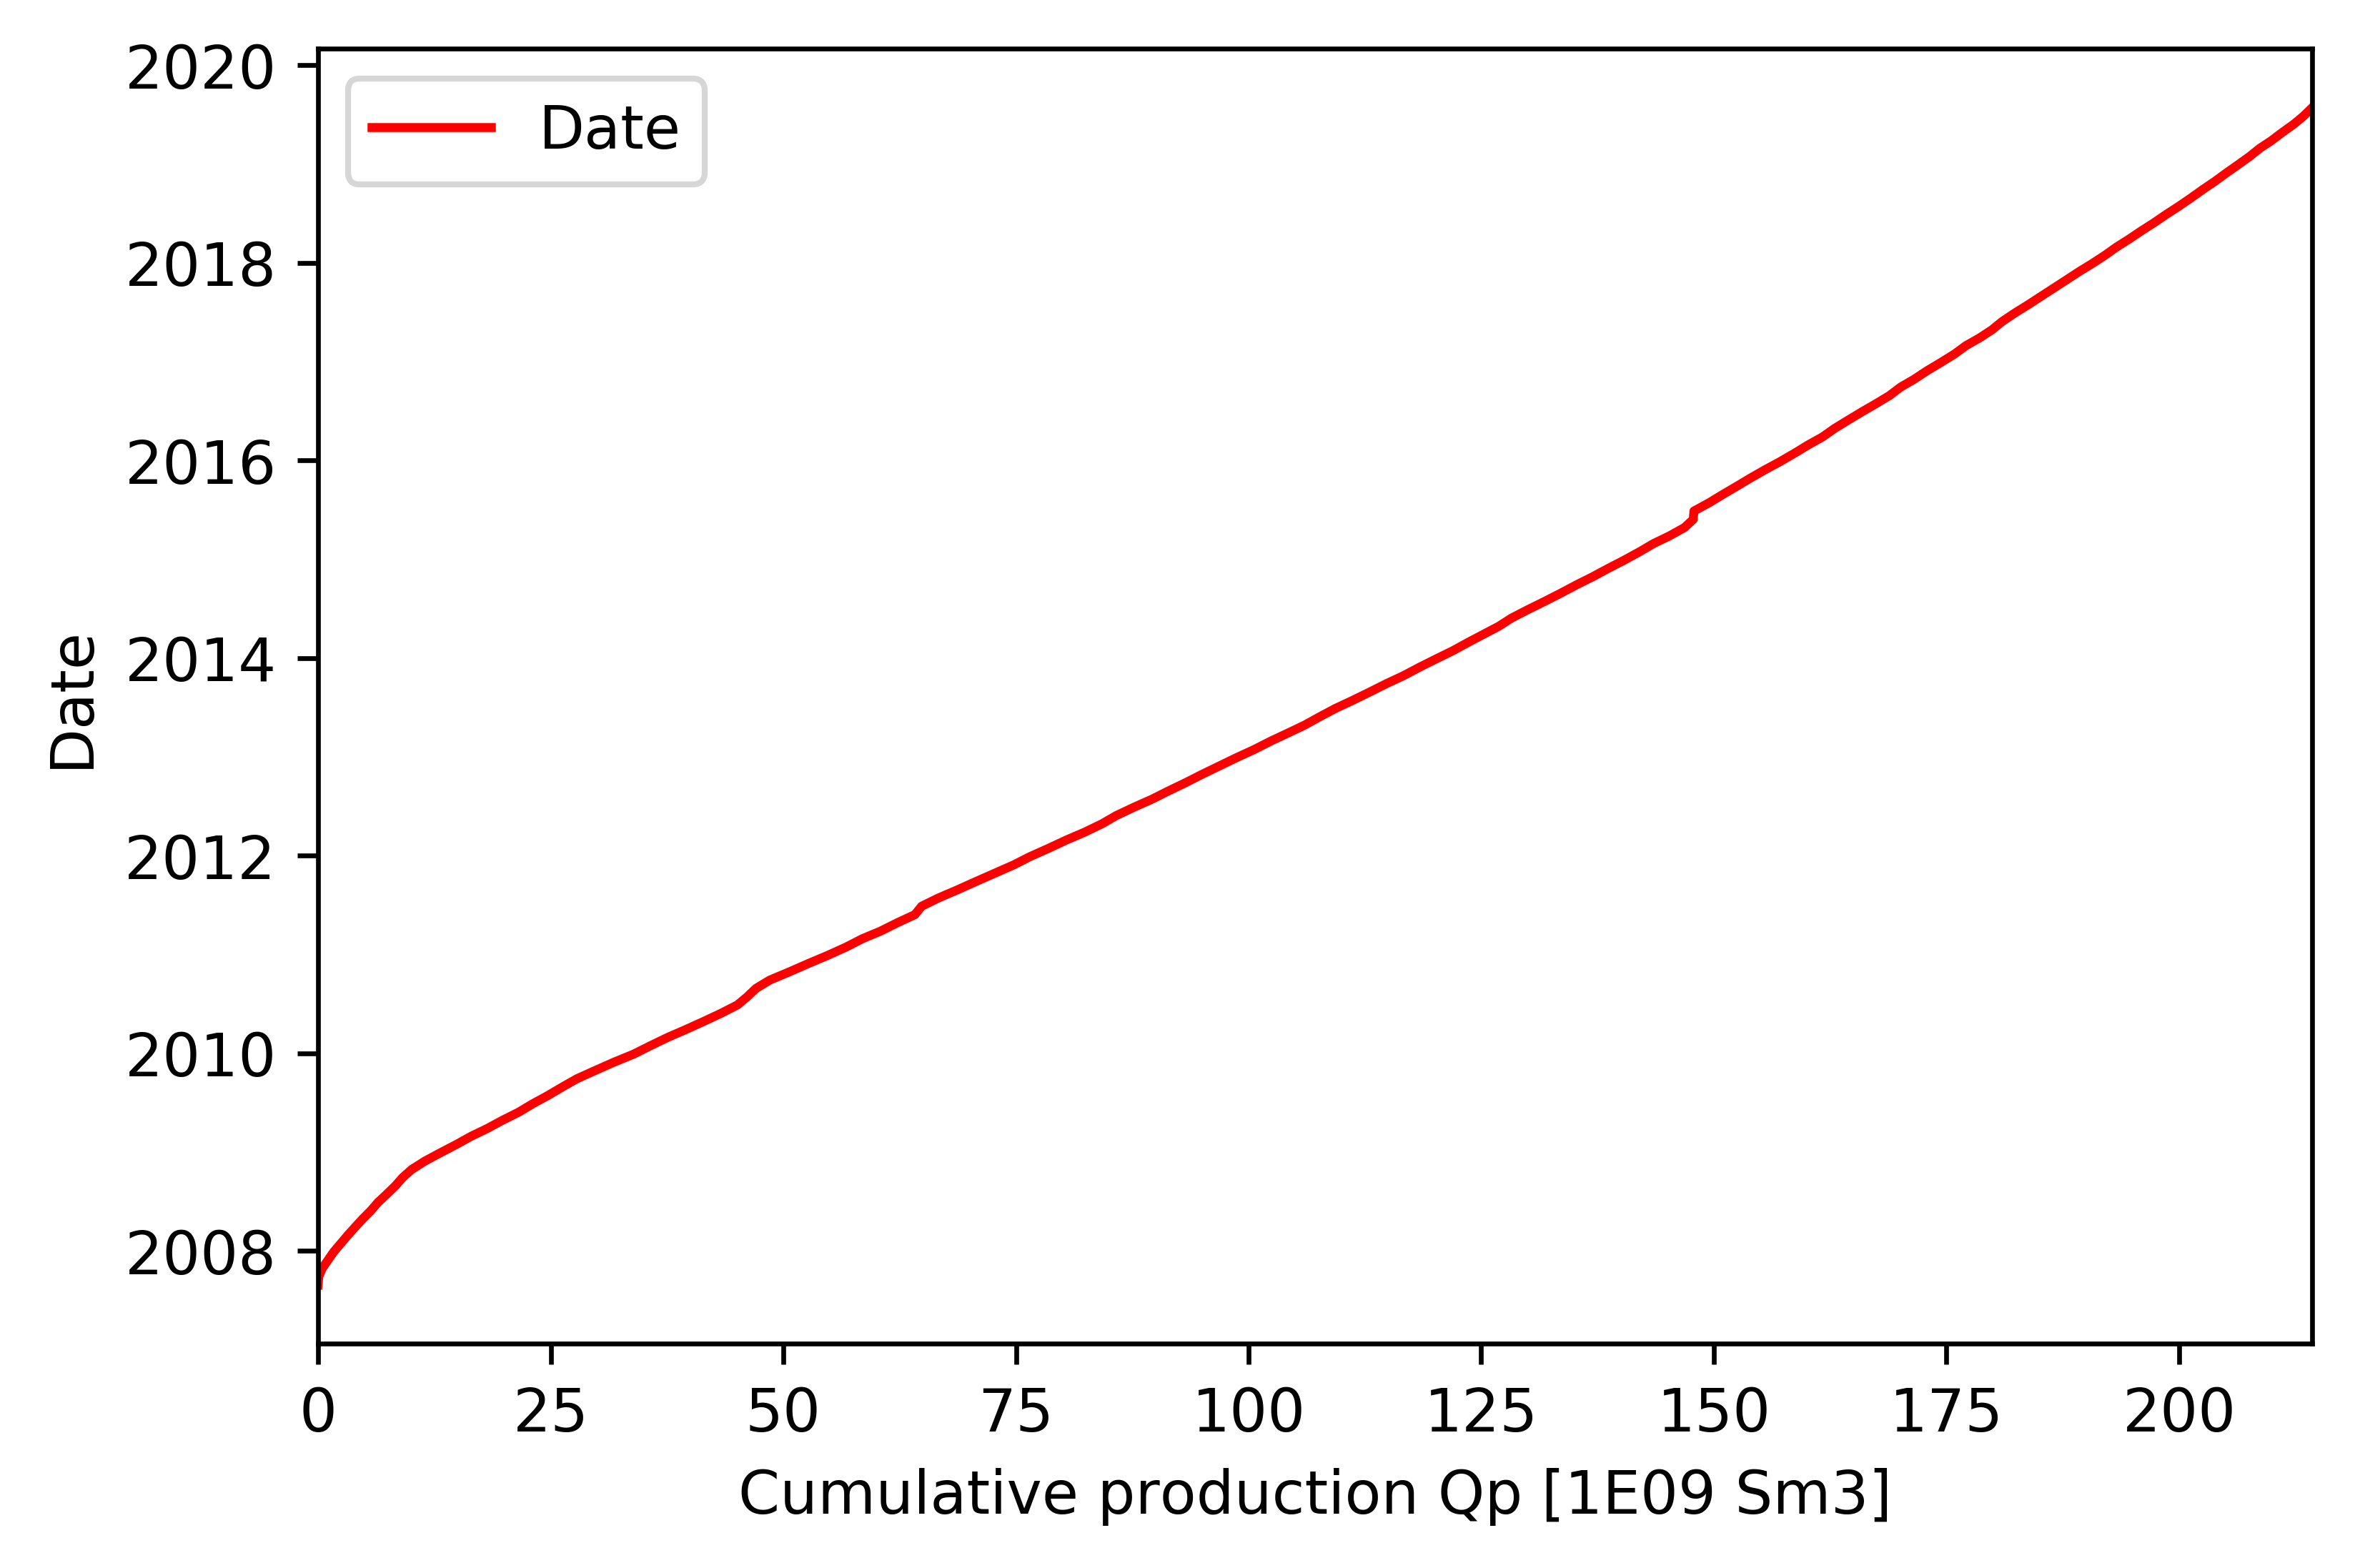

In [14]:
#Date vs Qp
dfFieldProd.plot('Qp','Date',color='red',xlim=(0))
plt.xlabel('Cumulative production Qp [1E09 Sm3]')
plt.ylabel('Date')
plt.show()

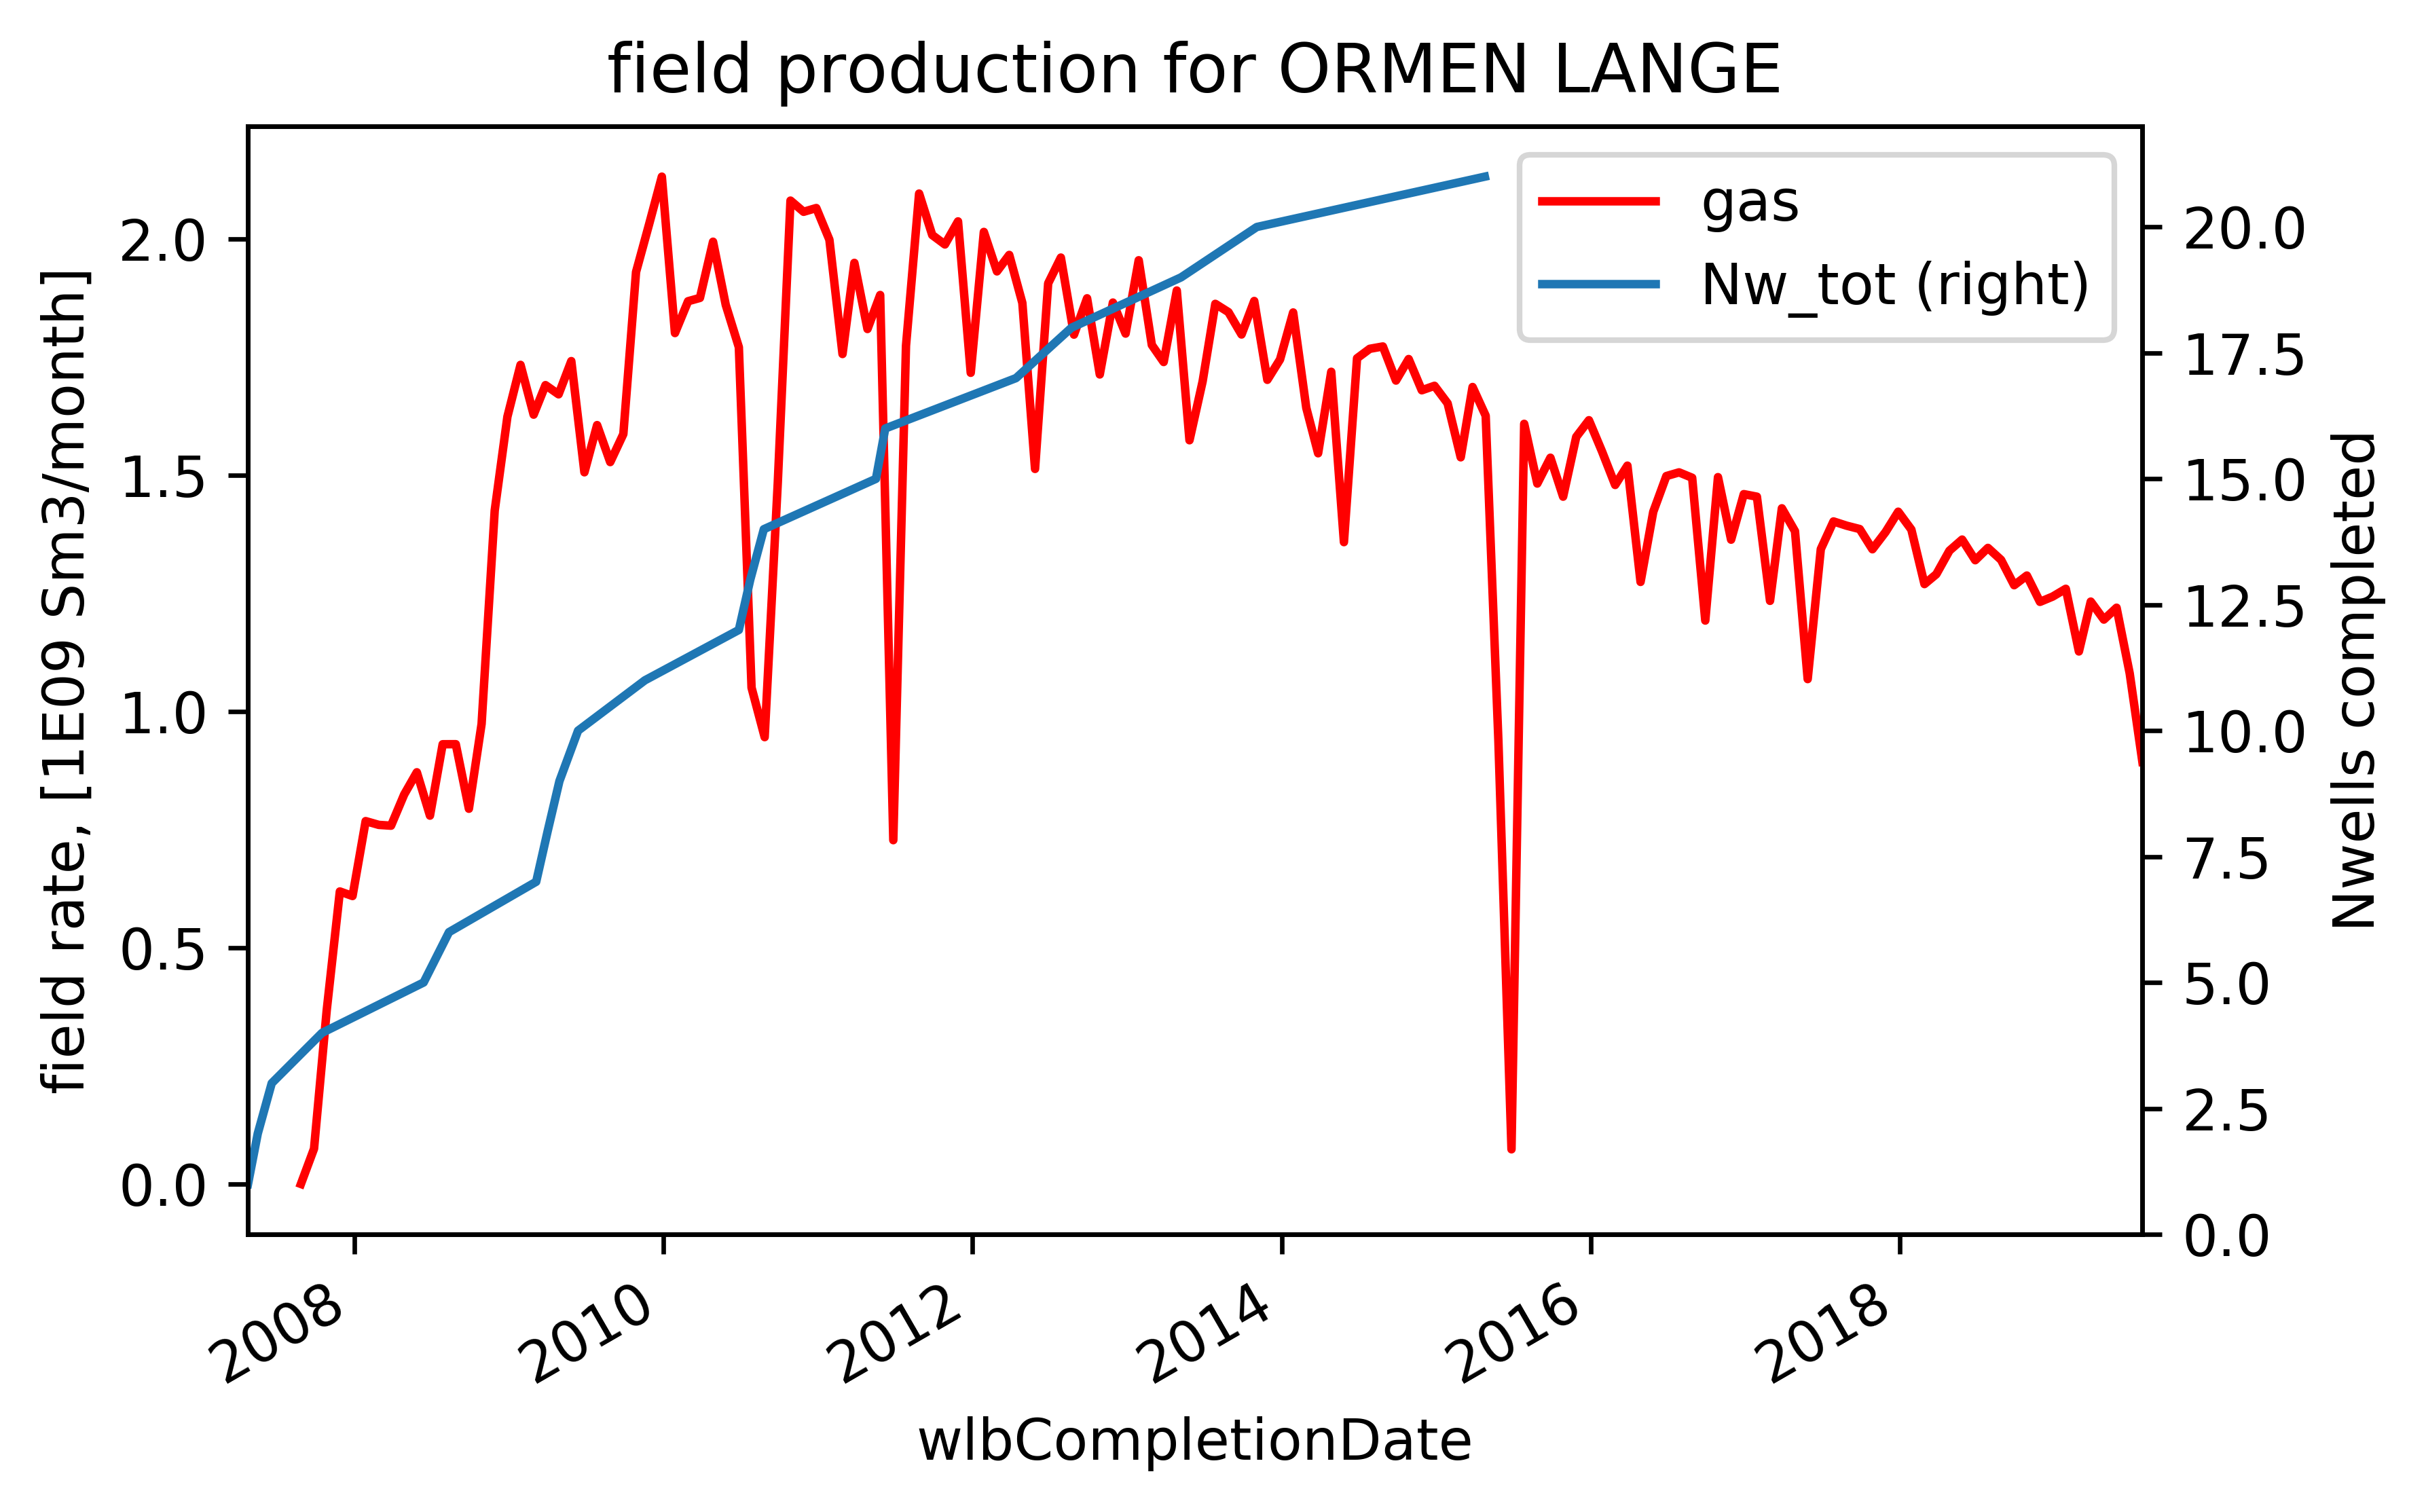

In [15]:
#Field production and Nw vs date
ax=dfFieldProd.plot(x='Date',y=fluid,color='red')
plt.title('field production for '+ field )
plt.xlabel('date [years]')
plt.ylabel('field rate, [1E09 Sm3/month]')
dfWell.plot('wlbCompletionDate','Nw_tot',secondary_y=True,ax=ax)
plt.ylabel('Nwells completed')
plt.show()

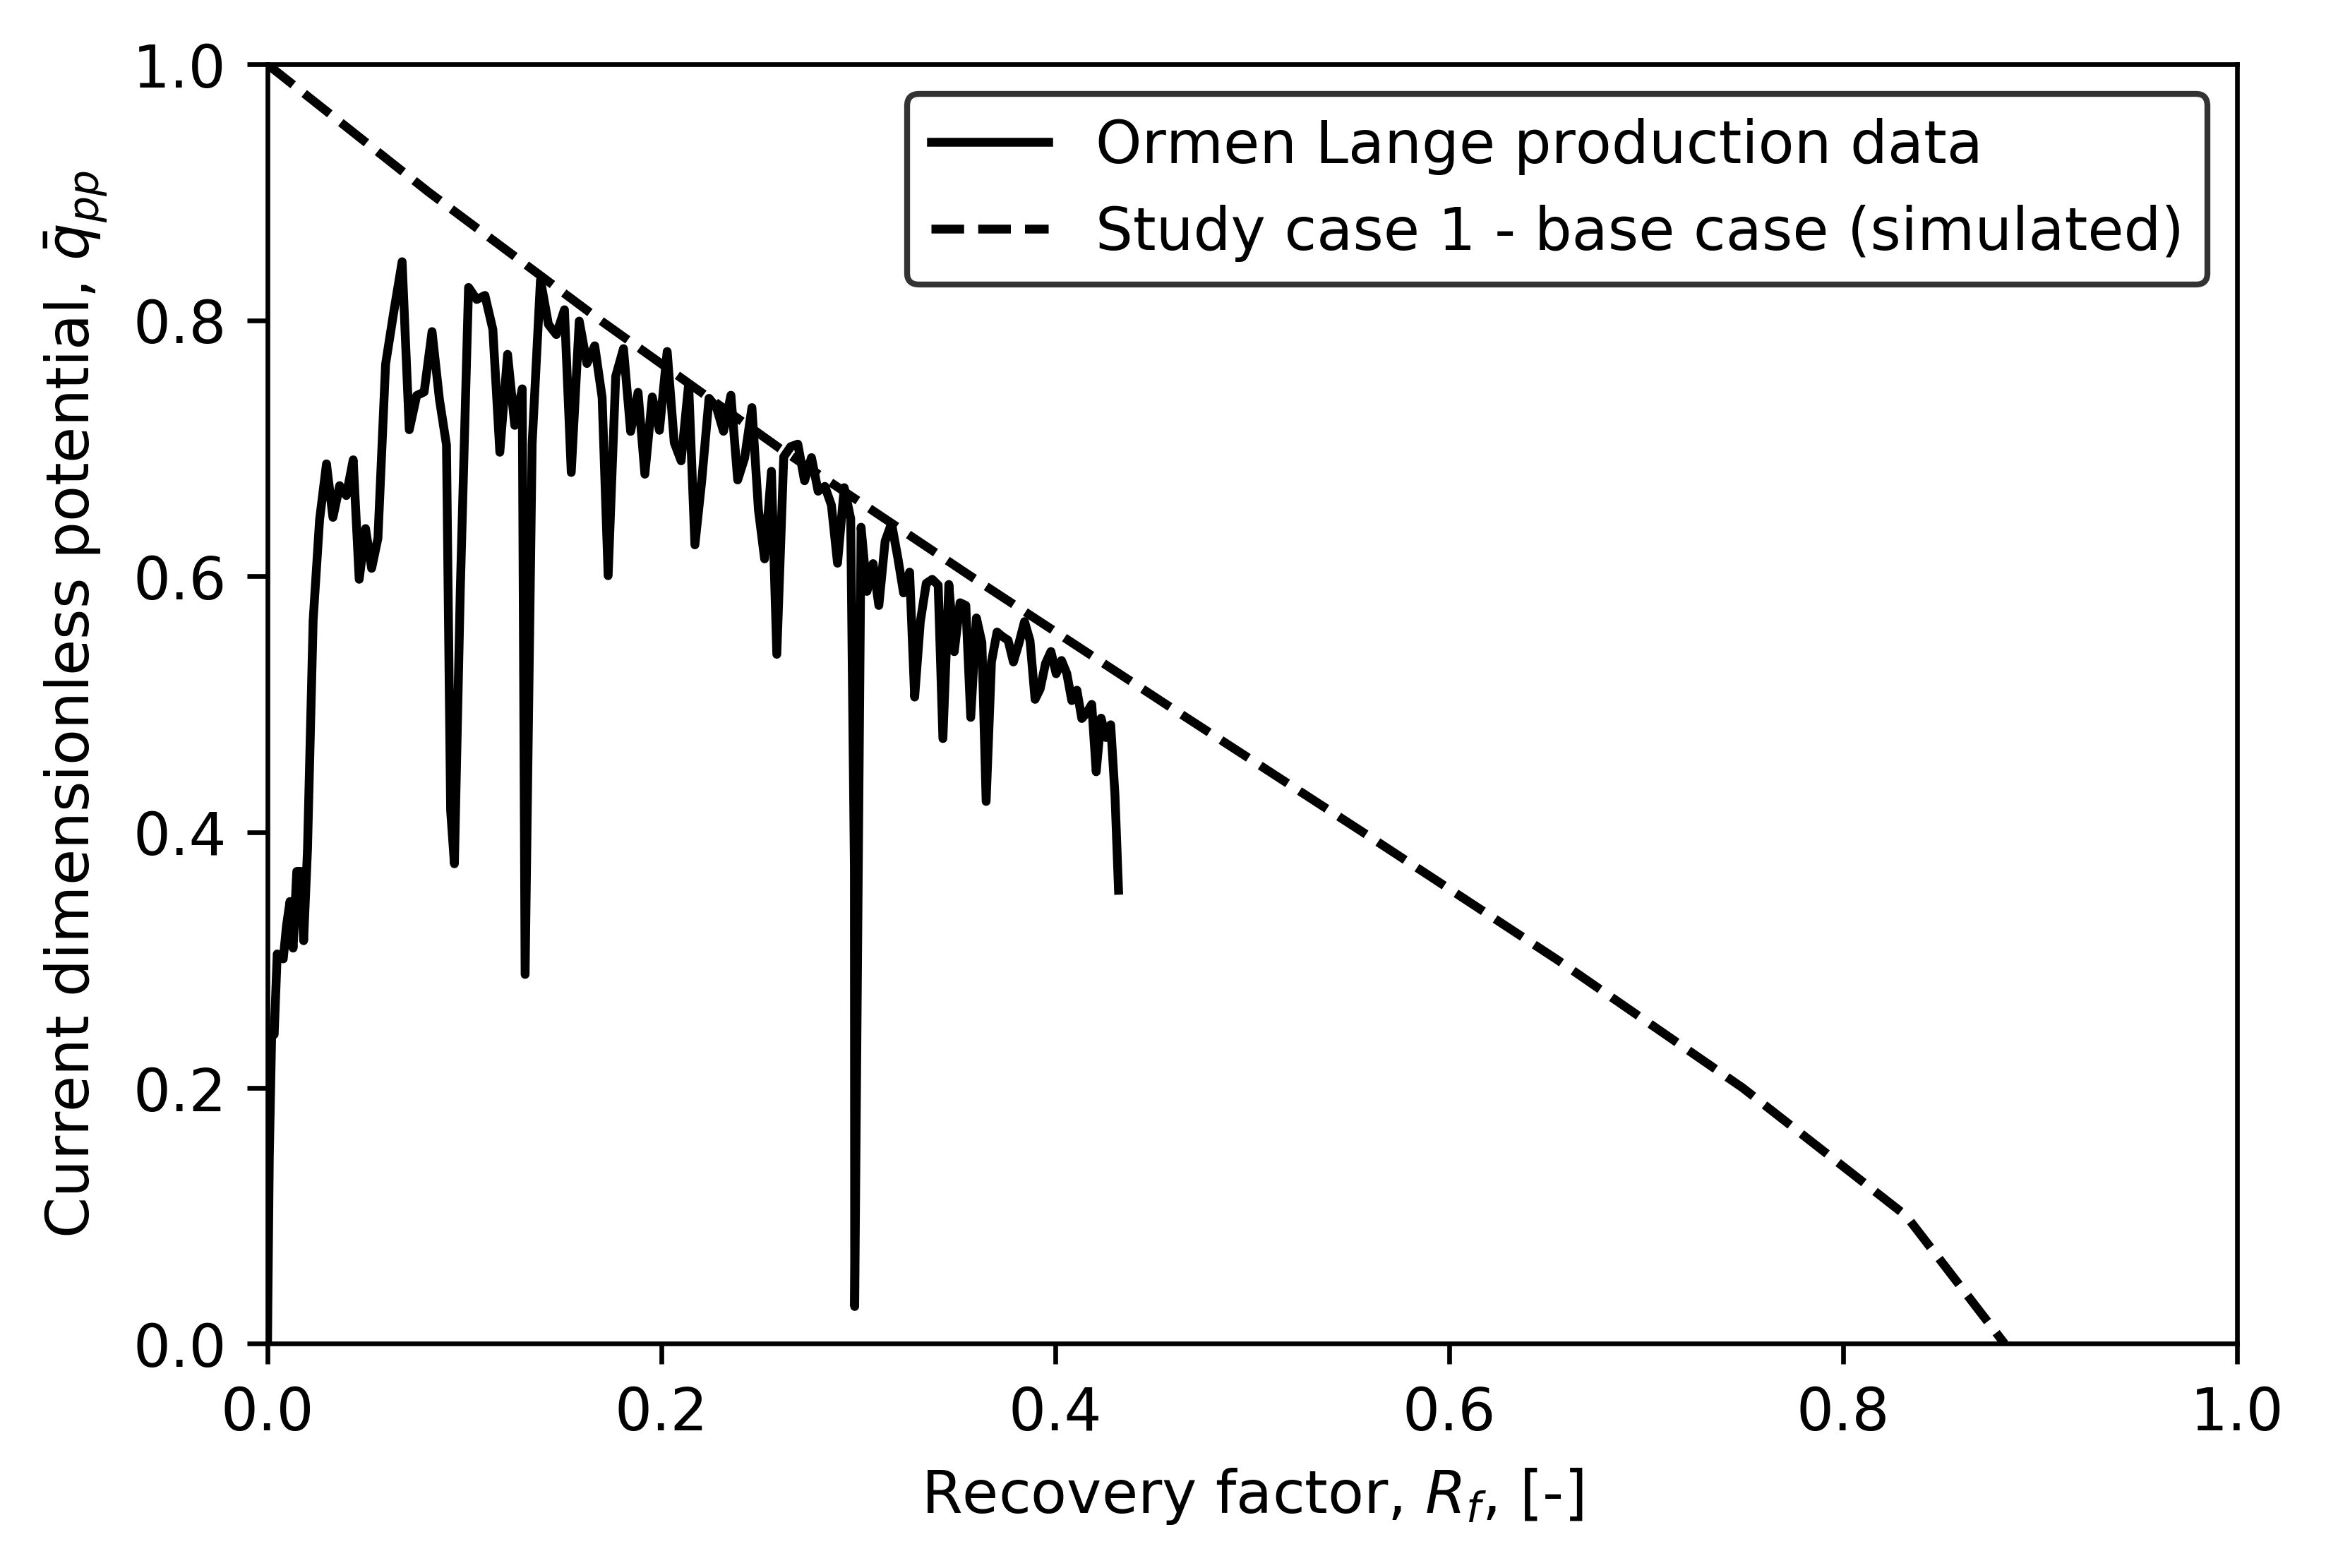

In [16]:
#Curve of current dimensionless potential versus recovery factor to use
#Dry gas
RF=np.array([0.000,	0.082,	0.169,	0.260,	0.357,	0.456,	0.556,	0.655,	0.749, 0.832,	0.882])
qpp_D=np.array([1.000,	0.900,	0.800,	0.700,	0.600,	0.500,	0.400,	0.300,	0.200,	0.100,	0.000])
#Dimensionless Field rate vs RF
Q=(305.96+190) #produced so far + remaining (value to adjust)[1E06 Sm3]
qmax_i=2.52      #Sm3/month
dfFieldProd['RF']=dfFieldProd['Qp']/Q
dfFieldProd['qmax_n']=dfFieldProd[fluid]/qmax_i
plt.rcParams["figure.dpi"] = 600
dfFieldProd.plot('RF','qmax_n',label='Ormen Lange production data',color='black',ylim=(0),xlim=(0))
plt.plot(RF,qpp_D,label='Study case 1 - base case (simulated)',color='black', linestyle='--')
leg = plt.legend()
leg.get_frame().set_edgecolor('black')
plt.ylim([0,1])
plt.xlim([0,1])
plt.xlabel('Recovery factor, $R_f$, [-]')
plt.ylabel(r'Current dimensionless potential, $\bar q_{pp}$')
plt.show()